In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# autocomplete
%config Completer.use_jedi = False

# import libraries for web scraping
from bs4 import BeautifulSoup as bs
import requests

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0",
    "Accept-Language": "en-US,en;q=0.5",  
    "Referer": "https://google.com",
    "DNT": "1"
}

## 1. Get the data, colletting the URL's

In [3]:
url_1 = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc'
url_2 = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&start=51&ref_=adv_nxt'   

response = requests.get(url_1)

html = response.content

soup = bs(html, "lxml")

In [4]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 100"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_100" rel="canonical"/>
<meta content="http://ww

In [5]:
top100_url = []

# 1-50 
    
url_1 = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc'
  
response = requests.get(url_1, headers=headers)

html = response.content

soup = bs(html, "lxml")


# get the url's (titles)

first_part_url = 'https://www.imdb.com/'

all_h3 = soup.find_all("h3", class_="lister-item-header")
for h3 in all_h3:
    second_part_url = h3.find('a').get('href')
    full_url = first_part_url + second_part_url
    top100_url.append(full_url)
    print(full_url)
    
print('-----------------------------------------------------------------')  

# 51-100

url_2 = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&start=51&ref_=adv_nxt'   

response = requests.get(url_2, headers=headers)

html = response.content

soup = bs(html, "lxml")


# get the url's (titles)

first_part_url = 'https://www.imdb.com/'

all_h3 = soup.find_all("h3", class_="lister-item-header")
for h3 in all_h3:
    second_part_url = h3.find('a').get('href')
    full_url = first_part_url + second_part_url
    top100_url.append(full_url)
    print(full_url)  

https://www.imdb.com//title/tt0111161/?ref_=adv_li_tt
https://www.imdb.com//title/tt0068646/?ref_=adv_li_tt
https://www.imdb.com//title/tt0468569/?ref_=adv_li_tt
https://www.imdb.com//title/tt0071562/?ref_=adv_li_tt
https://www.imdb.com//title/tt0050083/?ref_=adv_li_tt
https://www.imdb.com//title/tt0167260/?ref_=adv_li_tt
https://www.imdb.com//title/tt0110912/?ref_=adv_li_tt
https://www.imdb.com//title/tt0108052/?ref_=adv_li_tt
https://www.imdb.com//title/tt1375666/?ref_=adv_li_tt
https://www.imdb.com//title/tt0137523/?ref_=adv_li_tt
https://www.imdb.com//title/tt0120737/?ref_=adv_li_tt
https://www.imdb.com//title/tt0109830/?ref_=adv_li_tt
https://www.imdb.com//title/tt0060196/?ref_=adv_li_tt
https://www.imdb.com//title/tt0167261/?ref_=adv_li_tt
https://www.imdb.com//title/tt0133093/?ref_=adv_li_tt
https://www.imdb.com//title/tt0099685/?ref_=adv_li_tt
https://www.imdb.com//title/tt0080684/?ref_=adv_li_tt
https://www.imdb.com//title/tt0073486/?ref_=adv_li_tt
https://www.imdb.com//title/

## 2. Scraping the necessary data from the individual URL's 

In [7]:
spec_url = 'https://www.imdb.com//title/tt0111161/?ref_=adv_li_tt'

response = requests.get(spec_url, headers=headers)

html = response.content

soup_unique = bs(html, "lxml")

In [8]:
# scrape the title
title = soup_unique.find_all("h1")
print(title[0].get_text(strip = True))                                   

The Shawshank Redemption


In [9]:
# scrape the year
year = soup_unique.find_all("ul", {"data-testid":"hero-title-block__metadata"})
year = year[0].find('a').get_text(strip=True)
year

'1994'

In [10]:
# scrape the director
director = soup_unique.find_all("div", class_="ipc-metadata-list-item__content-container")
director = director[0].find('a').get_text(strip=True)
director

'Frank Darabont'

In [11]:
# scrape the budgets
all_budget = soup_unique.find_all("span", class_="ipc-metadata-list-item__list-content-item")
for budget in all_budget:
    b = budget.get_text(strip = True)
    if b.find("$") >= 0:
        print(b)

$25,000,000 (estimated)
$28,699,976
$727,327
$28,817,291


In [12]:
# cleaning and converting the scraped data into a number format

#example
financial = "$25,000,000 (estimated)"
financial = financial.split(" ")[0]
financial = financial.strip("$").replace(",", "")
financial = float(financial)
financial

25000000.0

## 3. Putting all data into a big nested list

In [13]:
# creating a big for loop for scraping all the data and put the current movie values in a list

all_movies = []

for url in top100_url:
    #create two lists for the current movies datas
    current_movie = []
    current_movie_data = []

    response = requests.get(url, headers=headers)
    html = response.content
    soup = bs(html, "lxml")

    #title
    h1 = soup.find_all("h1")
    h1 = h1[0].get_text(strip = True)
    current_movie.append(h1)
    print(h1)
    
    #year
    year = soup.find_all("ul", {"data-testid":"hero-title-block__metadata"})
    year = year[0].find('a').get_text(strip=True)
    current_movie.append(year)
    print(year)
    
    #scrape the director
    director = soup.find_all("div", class_="ipc-metadata-list-item__content-container")
    director = director[0].find('a').get_text(strip=True)
    current_movie.append(director)
    print(director)
    
    #financial_data
    all_budget = soup.find_all("span", class_="ipc-metadata-list-item__list-content-item")
    for budget in all_budget:
        budget_final = budget.get_text(strip = True)
        if budget_final.find("$") >= 0:
            budget_final = budget_final.split(" ")[0]
            budget_final = budget_final.strip("R$").replace(",", "")
            budget_final = float(budget_final)
            current_movie.append(budget_final)
            print(budget_final)
            
    print('------------------------------------')
    
# preparing for a nested list: putting all movies all data into that nested list

    #title
    try:
        current_movie_data.append(current_movie[0])
    except:
        current_movie_data.append(0) # if one of the data is fail, put a 0 instead
        
    #year
    try:
        current_movie_data.append(current_movie[1])
    except:
        current_movie_data.append(0)
        
    #director
    try:
        current_movie_data.append(current_movie[2])
    except:
        current_movie_data.append(0)
        
    #budget
    try:
        current_movie_data.append(current_movie[3])
    except:
        current_movie_data.append(0)
        
    #gross worldwide
    try:
        if current_movie[-1] == current_movie[0] or current_movie[-1] == current_movie[1] or current_movie[-1] == current_movie[2] or current_movie[-1] == current_movie[3]:
            current_movie_data.append(0) # exclude the equality the gross ww withe the title, the year or the budget
        else:
            current_movie_data.append(current_movie[-1])
    except:
        current_movie_data.append(0)
            
        
        
    all_movies.append(current_movie_data)

The Shawshank Redemption
1994
Frank Darabont
25000000.0
28699976.0
727327.0
28817291.0
------------------------------------
The Godfather
1972
Francis Ford Coppola
6000000.0
134966411.0
302393.0
246120986.0
------------------------------------
The Dark Knight
2008
Christopher Nolan
185000000.0
534858444.0
158411483.0
1005973645.0
------------------------------------
The Godfather: Part II
1974
Francis Ford Coppola
13000000.0
47834595.0
171417.0
48035783.0
------------------------------------
12 Angry Men
1957
Sidney Lumet
350000.0
955.0
------------------------------------
The Lord of the Rings: The Return of the King
2003
Peter Jackson
94000000.0
377845905.0
72629713.0
1146030912.0
------------------------------------
Pulp Fiction
1994
Quentin Tarantino
8000000.0
107928762.0
9311882.0
213928762.0
------------------------------------
Schindler's List
1993
Steven Spielberg
22000000.0
96898818.0
656636.0
322161245.0
------------------------------------
Inception
2010
Christopher Nolan
16

In [14]:
all_movies

[['The Shawshank Redemption',
  '1994',
  'Frank Darabont',
  25000000.0,
  28817291.0],
 ['The Godfather', '1972', 'Francis Ford Coppola', 6000000.0, 246120986.0],
 ['The Dark Knight', '2008', 'Christopher Nolan', 185000000.0, 1005973645.0],
 ['The Godfather: Part II',
  '1974',
  'Francis Ford Coppola',
  13000000.0,
  48035783.0],
 ['12 Angry Men', '1957', 'Sidney Lumet', 350000.0, 955.0],
 ['The Lord of the Rings: The Return of the King',
  '2003',
  'Peter Jackson',
  94000000.0,
  1146030912.0],
 ['Pulp Fiction', '1994', 'Quentin Tarantino', 8000000.0, 213928762.0],
 ["Schindler's List", '1993', 'Steven Spielberg', 22000000.0, 322161245.0],
 ['Inception', '2010', 'Christopher Nolan', 160000000.0, 836836967.0],
 ['Fight Club', '1999', 'David Fincher', 63000000.0, 101209702.0],
 ['The Lord of the Rings: The Fellowship of the Ring',
  '2001',
  'Peter Jackson',
  93000000.0,
  897690072.0],
 ['Forrest Gump', '1994', 'Robert Zemeckis', 55000000.0, 678226133.0],
 ['The Good, the Bad a

## 4. Bringing into pandas for analysis

In [15]:
all_movies_df = pd.DataFrame(all_movies, columns=['title', 'year', 'director', 'budget', 'gross_ww'])
all_movies_df

,title,year,director,budget,gross_ww
0,The Shawshank Redemption,1994,Frank Darabont,25000000.0,2.881729e+07
1,The Godfather,1972,Francis Ford Coppola,6000000.0,2.461210e+08
2,The Dark Knight,2008,Christopher Nolan,185000000.0,1.005974e+09
3,The Godfather: Part II,1974,Francis Ford Coppola,13000000.0,4.803578e+07
4,12 Angry Men,1957,Sidney Lumet,350000.0,9.550000e+02
...,...,...,...,...,...
95,Vertigo,1958,Alfred Hitchcock,2479000.0,7.797728e+06
96,Singin' in the Rain,1952,Stanley Donen,2540800.0,1.865056e+06
97,Bicycle Thieves,1948,Vittorio De Sica,133000.0,4.366550e+05
98,Citizen Kane,1941,Orson Welles,839727.0,1.603237e+06


In [16]:
# add ROI (Return On Investment) column
all_movies_df['roi'] = all_movies_df['gross_ww'] / all_movies_df['budget'] 
all_movies_df

,title,year,director,budget,gross_ww,roi
0,The Shawshank Redemption,1994,Frank Darabont,25000000.0,2.881729e+07,1.152692
1,The Godfather,1972,Francis Ford Coppola,6000000.0,2.461210e+08,41.020164
2,The Dark Knight,2008,Christopher Nolan,185000000.0,1.005974e+09,5.437695
3,The Godfather: Part II,1974,Francis Ford Coppola,13000000.0,4.803578e+07,3.695060
4,12 Angry Men,1957,Sidney Lumet,350000.0,9.550000e+02,0.002729
...,...,...,...,...,...,...
95,Vertigo,1958,Alfred Hitchcock,2479000.0,7.797728e+06,3.145514
96,Singin' in the Rain,1952,Stanley Donen,2540800.0,1.865056e+06,0.734043
97,Bicycle Thieves,1948,Vittorio De Sica,133000.0,4.366550e+05,3.283120
98,Citizen Kane,1941,Orson Welles,839727.0,1.603237e+06,1.909236


In [17]:
#formatting
pd.options.display.float_format = "{:,.2f}".format
all_movies_df

,title,year,director,budget,gross_ww,roi
0,The Shawshank Redemption,1994,Frank Darabont,"25,000,000.00","28,817,291.00",1.15
1,The Godfather,1972,Francis Ford Coppola,"6,000,000.00","246,120,986.00",41.02
2,The Dark Knight,2008,Christopher Nolan,"185,000,000.00","1,005,973,645.00",5.44
3,The Godfather: Part II,1974,Francis Ford Coppola,"13,000,000.00","48,035,783.00",3.70
4,12 Angry Men,1957,Sidney Lumet,"350,000.00",955.00,0.00
...,...,...,...,...,...,...
95,Vertigo,1958,Alfred Hitchcock,"2,479,000.00","7,797,728.00",3.15
96,Singin' in the Rain,1952,Stanley Donen,"2,540,800.00","1,865,056.00",0.73
97,Bicycle Thieves,1948,Vittorio De Sica,"133,000.00","436,655.00",3.28
98,Citizen Kane,1941,Orson Welles,"839,727.00","1,603,237.00",1.91


## Analysis (Best and Worst ROIs, budgets, revenues, TOP directors)

In [18]:
#TOP 10 best ROI-s
all_movies_df.sort_values(by='roi', ascending = False).head(10)

,title,year,director,budget,gross_ww,roi
87,Come and See,1985,Elem Klimov,"71,909.00","20,929,068.00",291.05
54,Your Name.,2016,Makoto Shinkai,"5,017,246.00","358,180,115.00",71.39
27,Star Wars: Episode IV - A New Hope,1977,George Lucas,"11,000,000.00","775,398,007.00",70.49
32,The Intouchables,2011,Olivier Nakache,"10,198,820.00","426,588,510.00",41.83
1,The Godfather,1972,Francis Ford Coppola,"6,000,000.00","246,120,986.00",41.02
46,Psycho,1960,Alfred Hitchcock,"806,947.00","32,041,845.00",39.71
64,The Lives of Others,2006,Florian Henckel von Donnersmarck,"2,000,000.00","77,356,942.00",38.68
47,Rear Window,1954,Alfred Hitchcock,"1,000,000.00","37,034,514.00",37.03
17,One Flew Over the Cuckoo's Nest,1975,Milos Forman,"3,000,000.00","109,118,959.00",36.37
67,Princess Mononoke,1997,Hayao Miyazaki,"4,845,631.00","169,785,704.00",35.04


In [19]:
#TOP 10 budgets
all_movies_df.sort_values(by='budget', ascending = False).head(10)

,title,year,director,budget,gross_ww,roi
56,Avengers: Endgame,2019,Anthony Russo,"356,000,000.00","2,797,501,328.00",7.86
57,Avengers: Infinity War,2018,Anthony Russo,"321,000,000.00","2,048,359,754.00",6.38
60,The Dark Knight Rises,2012,Christopher Nolan,"250,000,000.00","1,081,142,612.00",4.32
2,The Dark Knight,2008,Christopher Nolan,"185,000,000.00","1,005,973,645.00",5.44
63,WALL·E,2008,Andrew Stanton,"180,000,000.00","521,311,890.00",2.90
58,Coco,2017,Lee Unkrich,"175,000,000.00","807,817,888.00",4.62
19,Interstellar,2014,Christopher Nolan,"165,000,000.00","701,729,206.00",4.25
8,Inception,2010,Christopher Nolan,"160,000,000.00","836,836,967.00",5.23
36,Gladiator,2000,Ridley Scott,"103,000,000.00","465,380,802.00",4.52
41,Terminator 2: Judgment Day,1991,James Cameron,"102,000,000.00","520,881,154.00",5.11


In [20]:
#TOP 10 gross_ww
all_movies_df.sort_values(by='gross_ww', ascending = False).head(10)

,title,year,director,budget,gross_ww,roi
56,Avengers: Endgame,2019,Anthony Russo,"356,000,000.00","2,797,501,328.00",7.86
57,Avengers: Infinity War,2018,Anthony Russo,"321,000,000.00","2,048,359,754.00",6.38
5,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"94,000,000.00","1,146,030,912.00",12.19
60,The Dark Knight Rises,2012,Christopher Nolan,"250,000,000.00","1,081,142,612.00",4.32
53,Joker,2019,Todd Phillips,"55,000,000.00","1,074,419,384.00",19.53
40,The Lion King,1994,Roger Allers,"45,000,000.00","1,063,611,805.00",23.64
2,The Dark Knight,2008,Christopher Nolan,"185,000,000.00","1,005,973,645.00",5.44
13,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"94,000,000.00","947,495,095.00",10.08
10,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"93,000,000.00","897,690,072.00",9.65
8,Inception,2010,Christopher Nolan,"160,000,000.00","836,836,967.00",5.23


In [21]:
#Worst ROI-s
all_movies_df.sort_values(by='roi', ascending = False).tail(10)

,title,year,director,budget,gross_ww,roi
50,City Lights,1931,Charles Chaplin,"1,500,000.00","47,017.00",0.03
94,North by Northwest,1959,Alfred Hitchcock,"3,101,000.00","75,591.00",0.02
75,Paths of Glory,1957,Stanley Kubrick,"935,000.00","5,252.00",0.01
4,12 Angry Men,1957,Sidney Lumet,"350,000.00",955.00,0.00
74,Witness for the Prosecution,1957,Billy Wilder,"3,000,000.00","7,693.00",0.00
92,Das Boot,1981,Wolfgang Petersen,"11,487,676.00",0.00,0.00
72,High and Low,1963,Akira Kurosawa,"46,808.00",0.00,0.00
28,Hara-Kiri,1962,Masaki Kobayashi,"15,222.00",0.00,0.00
99,M,1931,Fritz Lang,"35,566.00",0.00,0.00
51,Hamilton,2020,Thomas Kail,0.00,0.00,nan


In [22]:
#Worst gross_ww
all_movies_df.sort_values(by='gross_ww', ascending = False).tail(10)

,title,year,director,budget,gross_ww,roi
94,North by Northwest,1959,Alfred Hitchcock,"3,101,000.00","75,591.00",0.02
50,City Lights,1931,Charles Chaplin,"1,500,000.00","47,017.00",0.03
74,Witness for the Prosecution,1957,Billy Wilder,"3,000,000.00","7,693.00",0.00
75,Paths of Glory,1957,Stanley Kubrick,"935,000.00","5,252.00",0.01
4,12 Angry Men,1957,Sidney Lumet,"350,000.00",955.00,0.00
92,Das Boot,1981,Wolfgang Petersen,"11,487,676.00",0.00,0.00
72,High and Low,1963,Akira Kurosawa,"46,808.00",0.00,0.00
51,Hamilton,2020,Thomas Kail,0.00,0.00,nan
28,Hara-Kiri,1962,Masaki Kobayashi,"15,222.00",0.00,0.00
99,M,1931,Fritz Lang,"35,566.00",0.00,0.00


In [23]:
#TOP directors
all_movies_df.groupby("director").count().sort_values(by="title", ascending=False)[["title"]].head(5)

,title
director,
Christopher Nolan,6
Alfred Hitchcock,4
Quentin Tarantino,4
Stanley Kubrick,4
Steven Spielberg,3


<AxesSubplot:ylabel='Frequency'>

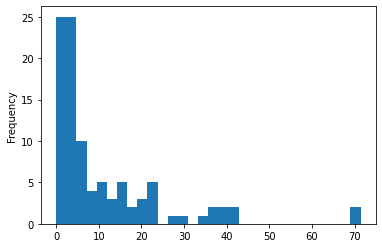

In [24]:
#ROI distributions
all_movies_df[all_movies_df.roi < 200].roi.plot.hist(bins=30)

## Correlation between budget and revenue

<AxesSubplot:xlabel='budget', ylabel='gross_ww'>

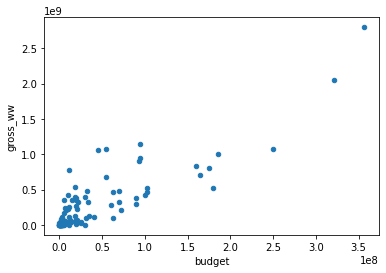

In [25]:
x = 'budget'
y = 'gross_ww'
all_movies_df.plot.scatter(x=x, y=y)

### Correlation calculations

In [26]:
all_movies_df[['budget', 'gross_ww']].corr(method='pearson')

,budget,gross_ww
budget,1.00,0.86
gross_ww,0.86,1.00


In [27]:
all_movies_df[['budget', 'gross_ww']].corr(method='kendall')

,budget,gross_ww
budget,1.00,0.64
gross_ww,0.64,1.00


In [28]:
all_movies_df[['budget', 'gross_ww']].corr(method='spearman')

,budget,gross_ww
budget,1.00,0.83
gross_ww,0.83,1.00


## Trends

In [29]:
all_movies_df

,title,year,director,budget,gross_ww,roi
0,The Shawshank Redemption,1994,Frank Darabont,"25,000,000.00","28,817,291.00",1.15
1,The Godfather,1972,Francis Ford Coppola,"6,000,000.00","246,120,986.00",41.02
2,The Dark Knight,2008,Christopher Nolan,"185,000,000.00","1,005,973,645.00",5.44
3,The Godfather: Part II,1974,Francis Ford Coppola,"13,000,000.00","48,035,783.00",3.70
4,12 Angry Men,1957,Sidney Lumet,"350,000.00",955.00,0.00
...,...,...,...,...,...,...
95,Vertigo,1958,Alfred Hitchcock,"2,479,000.00","7,797,728.00",3.15
96,Singin' in the Rain,1952,Stanley Donen,"2,540,800.00","1,865,056.00",0.73
97,Bicycle Thieves,1948,Vittorio De Sica,"133,000.00","436,655.00",3.28
98,Citizen Kane,1941,Orson Welles,"839,727.00","1,603,237.00",1.91


<AxesSubplot:xlabel='year'>

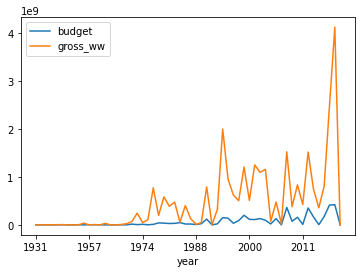

In [30]:
all_movies_df.groupby('year').sum()[['budget', 'gross_ww']].plot()